In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names=['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv('user_data.csv', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50.0,5.0,881250949.0
1,0,172.0,5.0,881250949.0
2,0,133.0,1.0,881250949.0
3,196,242.0,3.0,881250949.0
4,186,302.0,3.0,891717742.0


In [4]:
movie_titles=pd.read_csv('movie_data.csv',encoding='latin-1')

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=pd.merge(df, movie_titles, on="item_id")

In [16]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50.0,5.0,881250949.0,Star Wars (1977)
1,290,50.0,5.0,880473582.0,Star Wars (1977)
2,79,50.0,4.0,891271545.0,Star Wars (1977)
3,2,50.0,5.0,888552084.0,Star Wars (1977)
4,8,50.0,5.0,879362124.0,Star Wars (1977)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df1=df.groupby('title')

In [10]:
df1['rating'].mean().sort_values(ascending=False)

title
Maya Lin: A Strong Clear Vision (1994)        5.0
Santa with Muscles (1996)                     5.0
Delta of Venus (1994)                         5.0
Aiqing wansui (1994)                          5.0
The Deadly Cure (1996)                        5.0
                                             ... 
Every Other Weekend (1990)                    1.0
Touki Bouki (Journey of the Hyena) (1973)     1.0
Mighty, The (1998)                            1.0
Mille bolle blu (1993)                        1.0
Tigrero: A Film That Was Never Made (1994)    1.0
Name: rating, Length: 1627, dtype: float64

In [11]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      428
Contact (1997)                        372
Return of the Jedi (1983)             371
Scream (1996)                         361
Fargo (1996)                          359
                                     ... 
Daens (1992)                            1
Damsel in Distress, A (1937)            1
Little City (1998)                      1
Sweet Nothing (1995)                    1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1627, dtype: int64

In [12]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [13]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.250000
1-900 (1994),2.500000
101 Dalmatians (1996),2.935897
12 Angry Men (1957),4.348837
187 (1997),3.030303


In [14]:
ratings['number_of_ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.250000,8
1-900 (1994),2.500000,2
101 Dalmatians (1996),2.935897,78
12 Angry Men (1957),4.348837,86
187 (1997),3.030303,33


<AxesSubplot:>

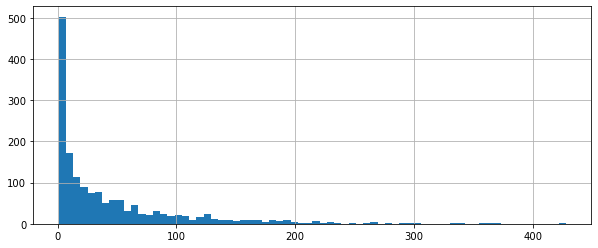

In [15]:
plt.figure(figsize=(10,4))
ratings["number_of_ratings"].hist(bins=70)

<AxesSubplot:>

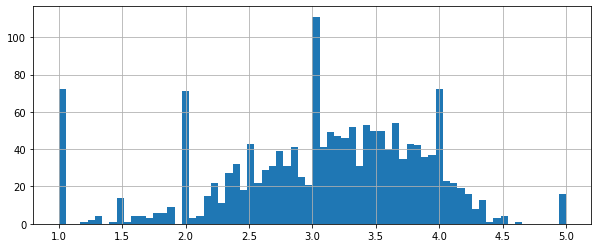

In [16]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

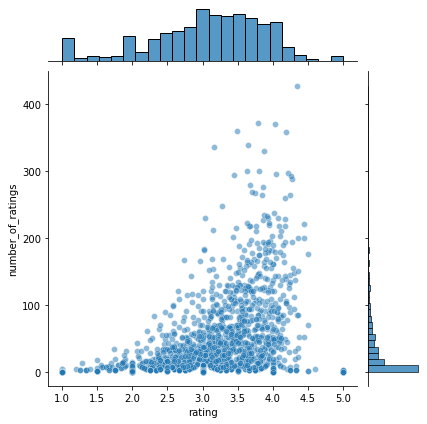

In [18]:
sns.jointplot(x='rating',y='number_of_ratings',data=ratings,alpha=0.5)

In [19]:
moviemat=df.pivot_table(index='user_id', columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [55]:
s=moviemat['Young Guns II (1990)']
s

user_id
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
939   NaN
940   NaN
941   NaN
942   NaN
943   NaN
Name: Young Guns II (1990), Length: 944, dtype: float64

In [61]:
for i in range (944):
    if(s[i]!=np.NaN):
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [21]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [22]:
similar_to_starwars

title
'Til There Was You (1997)                1.000000
1-900 (1994)                            -1.000000
101 Dalmatians (1996)                    0.106380
12 Angry Men (1957)                      0.421173
187 (1997)                               0.063436
                                           ...   
Young Guns II (1990)                     0.269437
Young Poisoner's Handbook, The (1995)   -0.198685
Zeus and Roxanne (1997)                  1.000000
unknown                                 -0.133631
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1627, dtype: float64

In [29]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-1.000000
101 Dalmatians (1996),0.106380
12 Angry Men (1957),0.421173
187 (1997),0.063436


In [30]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
'Til There Was You (1997),1.0
Meet Wally Sparks (1997),1.0
Star Wars (1977),1.0
"Awfully Big Adventure, An (1995)",1.0
Man of the Year (1995),1.0
Prisoner of the Mountains (Kavkazsky Plennik) (1996),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
Midnight Dancers (Sibak) (1994),1.0
Kissed (1996),1.0


In [32]:
corr_starwars = corr_starwars.join(ratings['number_of_ratings'])
corr_starwars.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),1.000000,8
1-900 (1994),-1.000000,2
101 Dalmatians (1996),0.106380,78
12 Angry Men (1957),0.421173,86
187 (1997),0.063436,33


In [34]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['number_of_ratings'])
corr_liarliar[corr_liarliar['number_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number_of_ratings
title,,
Liar Liar (1997),1.000000,337
Top Gun (1986),0.475338,162
Indiana Jones and the Last Crusade (1989),0.472707,234
Multiplicity (1996),0.467488,105
Jurassic Park (1993),0.466496,178


In [36]:
dt1 = pd.DataFrame({"A":[np.NaN, 5, 7, 8],  
                    "B":[5, 8, 4, 3], 
                    "C":[10, 4, 9, 3]}) 
  
# Creating the second dataframe  
dt2 = pd.DataFrame({"A":[5, 3, 6, 4], 
                    "B":[11, 2, 4, 3]}) 
  

In [38]:
dt1.corrwith(dt2, axis = 0) 

A    0.500000
B   -0.151186
C         NaN
dtype: float64